In [32]:
from src.models.modulated_siren import ModulatedSirenModel
from src.datasets.chairs import get_mgrid
import torch

In [33]:
from src.models.modulated_siren import ModulatedSirenModel
import pytorch_lightning as pl

# Create an instance of the ModulatedSirenModel
model = ModulatedSirenModel(in_features=2, hidden_features=256, hidden_layers=10, modulation_size=256, out_features=3, outermost_linear=True, first_omega_0=30, hidden_omega_0=30.)
dim = 128
representation_dim = 512
modulation_size = 256
hidden_features = 512
hidden_layers = 15
# Load the checkpoint
checkpoint_path = "checkpoints/meta_learning_canonical_chairs_one_angle_hidden_layers_15_modsize_256_dim_128_multistep_lr_3e-6_hidden_features_512/last.ckpt"
model = model.load_from_checkpoint(checkpoint_path, in_features=2, hidden_features=hidden_features, hidden_layers=hidden_layers, modulation_size=modulation_size, out_features=3, outermost_linear=True, first_omega_0=30, hidden_omega_0=30.)

LR IS 3e-06


LR IS 3e-06


Chairs dataset initialized
['292621234cdb42969c76680ce8100088', '768843209e734d569d1b527c1f3511a1', '66624c84a4d94559b35914ee2ada4c4b', 'a9328e057fe049ff8b0c35489e0dfb8d', '607a3bf3fbc54bd2b9da08c18f625ee4', '039c6026571943d6ac45c6816bcc7ff1', '4c302192035d40e59b7c0f18bb74f212', 'd2d5000b1e7a4d9a8a4a637267418061', '0f7366550f694e1cb9efddea214a3c33', '9f7890238c4442d789d1970cead93203', '3efb9e42f49f47c6bd1d36f86281888b', '9d53c4f8a4394a9ca333da20138cd897', '79c0f5d111324264b4c6fea9402df88e', '03f16302c1a54c46b438dac78e9d7048', '64b170e4864549c382b6c94c529203d7', '2820827abdcd4e79b7c67683292416aa', '934b7b5515da4720b0af2764924aad3a', '053039b95c314104b5fe0dfb19f43cb3', '43c8828e83124e1e90e85c9e57b404c8', '2ec01ec1eb874f6fb11ef732fb575267', '392e2810e1e24b02b2fdbc1dd3f21064', 'fab9443d48e24fbfa309187df78d58e6', '0edcc9053a114e7f8a706cae0864e7be', 'b10ee58a01b649d381598d899850176c', '15b2ebce6f084c3ea8d582c168ff478e', 'ddd35916c5d84fd8ab4c38380a73fb5b', '28d004c0d320423d89b6b4421c23df2f', 

tensor([[0.0007, 0.0007, 0.0008],
        [0.0007, 0.0007, 0.0007],
        [0.0007, 0.0007, 0.0007],
        ...,
        [0.0011, 0.0008, 0.0008],
        [0.0011, 0.0008, 0.0008],
        [0.0011, 0.0008, 0.0008]], grad_fn=<AddBackward0>)


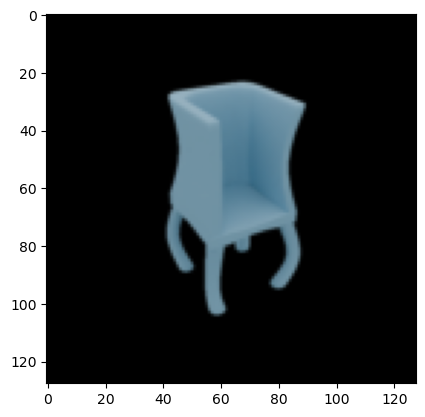

In [34]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from src.datamodules.chairs_datamodule import ChairsDatamodule
import torchvision. transforms as T
from PIL import Image

# Define the grid
chairs = ChairsDatamodule(path="/home/arkadi.piven/Code/functa/rendered/chair", dim=dim, batch_size=1)
transform = T.ToPILImage()
coords, pixels = chairs.train_dataset[0]
print(chairs.train_dataset.get_chair_name_by_idx(6))
coords = get_mgrid(representation_dim, 2)
print(pixels)
pixels = pixels * 0.5 + 0.5
# # Pass the coordinates through the model
model.phi.data = torch.zeros(modulation_size)
output = model(coords)
output = output * 0.5 + 0.5
print(output)


# Reshape the output to (512, 512, 3)
# print(output.shape)

# # Plot the image

plt.imshow(pixels.view(dim,dim,3).detach().numpy())

# plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


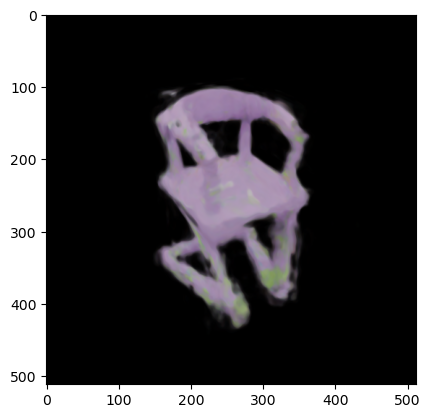

In [35]:
# Output base weights
plt.imshow(output.view(representation_dim,representation_dim,3).detach().numpy())

## Train latent and visualize

BEGIN OF TRAINING PHI Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 

  0%|          | 0/3 [00:00<?, ?it/s]

START PHI: Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.,

 33%|███▎      | 1/3 [00:04<00:08,  4.32s/it]

END PHI: Parameter containing:
tensor([-2.0552e-03, -2.7523e-03, -1.1048e-03, -1.3496e-03,  2.2329e-03,
        -2.4712e-03, -3.9364e-04,  1.4398e-03,  2.1070e-03,  3.2336e-03,
        -2.2813e-03,  5.6490e-04, -1.6849e-03,  6.1141e-04, -1.9967e-03,
        -1.1115e-03,  9.7423e-04, -6.2621e-04,  1.2357e-03, -2.6799e-03,
        -1.6054e-03, -1.4781e-04, -1.5901e-03, -1.3326e-03, -6.2266e-04,
         6.5379e-04,  1.6073e-03, -5.0563e-04, -3.1105e-03,  3.4034e-03,
        -1.0441e-03,  1.4110e-03, -5.2659e-04,  2.1519e-04,  3.8614e-03,
        -1.6682e-03, -1.1689e-03, -1.8234e-03,  2.2725e-03,  5.6822e-04,
        -1.8579e-04, -4.5870e-04, -5.6364e-04, -4.1752e-03,  2.0355e-03,
        -2.1175e-03,  1.4034e-03,  1.6763e-04,  2.5049e-03, -9.6161e-04,
         1.0047e-03,  4.0085e-03,  3.7681e-03,  1.3939e-03, -1.6364e-03,
        -3.0132e-03,  2.7012e-03,  7.9904e-04,  4.2368e-04,  5.5008e-03,
         1.5684e-03,  1.0910e-03, -1.0948e-03,  4.8290e-03, -7.0418e-04,
         1.2143e-03,

 67%|██████▋   | 2/3 [00:08<00:04,  4.29s/it]

END PHI: Parameter containing:
tensor([-8.5890e-04, -2.6825e-03, -7.4713e-04, -1.7843e-04,  6.6272e-04,
        -3.3580e-03,  1.9756e-04,  2.9308e-03,  2.6154e-03,  2.3960e-03,
        -2.6789e-03,  1.7545e-03, -2.2468e-03,  1.5340e-03, -2.3503e-03,
        -1.5821e-03,  5.3337e-04,  8.9868e-04,  2.7813e-03, -2.5101e-03,
        -2.4684e-03,  1.4927e-03, -3.5580e-03, -1.3435e-03, -2.3117e-03,
         5.0844e-04, -1.5585e-04, -3.5541e-04, -3.2624e-03,  5.0433e-03,
        -1.1114e-03,  2.2361e-03,  1.1986e-05,  4.8030e-04,  3.7531e-03,
        -2.7882e-03,  7.8858e-04, -3.1700e-03,  1.2909e-03,  2.5264e-03,
        -2.7080e-04, -3.7763e-04, -2.0716e-03, -3.4116e-03,  2.9263e-03,
        -3.0103e-03,  3.0817e-04,  1.1258e-03,  3.8958e-03, -5.6216e-04,
         1.2963e-04,  2.3546e-03,  3.3430e-03,  3.3751e-03,  5.7233e-04,
        -2.1635e-03,  2.4892e-03,  2.5543e-03,  3.2292e-04,  5.4185e-03,
        -6.5705e-04,  2.1514e-03, -1.6278e-03,  3.5595e-03,  1.4116e-03,
         8.5998e-04,

100%|██████████| 3/3 [00:12<00:00,  4.28s/it]

END PHI: Parameter containing:
tensor([-7.1667e-04, -1.1528e-03,  1.0825e-03,  1.5079e-03, -2.9984e-04,
        -1.2686e-03, -1.7757e-03,  2.4923e-03,  4.2447e-03, -1.2130e-03,
        -5.1186e-04,  4.2191e-03, -2.8495e-03,  5.0410e-04, -1.3888e-03,
        -2.4525e-03,  2.7252e-03,  1.6210e-05,  3.1434e-03, -4.9172e-03,
        -5.7697e-04,  3.8269e-05, -3.8837e-03, -5.7539e-04, -2.8352e-03,
        -2.8593e-03, -1.3935e-03,  8.9021e-04, -4.0604e-03,  2.7195e-03,
        -2.6248e-03,  9.2088e-04,  1.5024e-03,  1.0883e-03,  7.2665e-04,
        -6.0119e-04,  8.7697e-04, -1.5223e-03, -1.2988e-03,  2.3895e-03,
         2.7356e-03, -1.5197e-03, -3.1833e-03, -5.3032e-03,  2.5229e-03,
        -4.4839e-03,  1.1429e-03,  8.7411e-04,  5.7973e-03, -2.0081e-03,
         2.1610e-03,  3.7411e-03,  3.8692e-03,  2.2560e-03,  5.4331e-04,
        -3.9279e-03,  4.6526e-03,  6.7739e-04,  3.2837e-04,  5.9801e-03,
         6.6241e-04,  2.7995e-03, -3.9344e-03,  3.7883e-03,  6.2164e-04,
        -1.6388e-03,


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[0.0006, 0.0007, 0.0007],
        [0.0007, 0.0007, 0.0007],
        [0.0007, 0.0007, 0.0007],
        ...,
        [0.0009, 0.0007, 0.0009],
        [0.0009, 0.0007, 0.0009],
        [0.0009, 0.0007, 0.0008]], grad_fn=<AddBackward0>)
torch.Size([262144, 3])


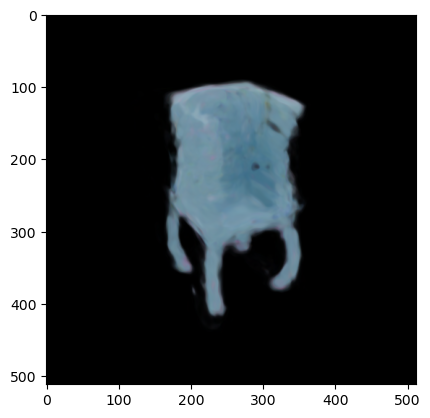

In [36]:
batch = chairs.train_dataset[0]
print(f"BEGIN OF TRAINING PHI {model.phi}")
model.train_latent(batch)
# model.train_latent((coords, pixels))
print(f"END OF TRAINING PHI {model.phi}")
coords = get_mgrid(representation_dim, 2)

output = model(coords)
output = output * 0.5 + 0.5
print(output)

print(output.shape)

# Plot the image
plt.imshow(output.view(representation_dim, representation_dim, 3).detach().numpy())

plt.show()
